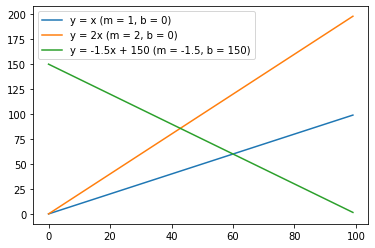

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(range(100))
y1 = x
y2 = 2 * x
y3 = -1.5 * x + 150

plt.plot(x, y1, label="y = x (m = 1, b = 0)")
plt.plot(x, y2, label="y = 2x (m = 2, b = 0)")
plt.plot(x, y3, label="y = -1.5x + 150 (m = -1.5, b = 150)")
plt.legend()

In [ ]:
x_data = np.random.random(100)
x_data *= 100
y_data = x_data * 2
for i in range(100):
  y_data[i] += np.random.random() * 100

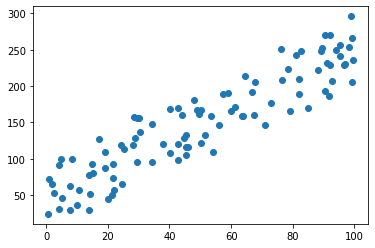

In [ ]:
plt.scatter(x_data, y_data)

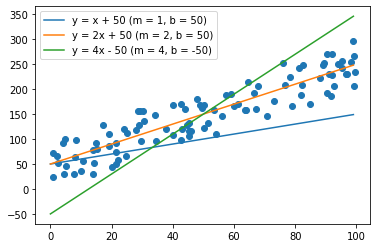

In [ ]:
plt.scatter(x_data, y_data)
x = np.array(range(100))

y1 = x * 2 + 50
y2 = x * 4 - 50
y3 = x + 50

plt.plot(x, y3, label="y = x + 50 (m = 1, b = 50)")
plt.plot(x, y1, label="y = 2x + 50 (m = 2, b = 50)")
plt.plot(x, y2, label="y = 4x - 50 (m = 4, b = -50)")
plt.legend()

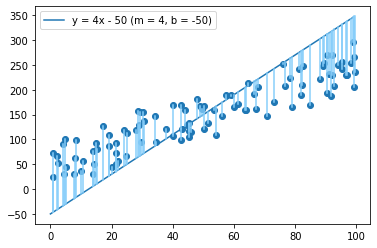

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x, y2, label="y = 4x - 50 (m = 4, b = -50)")
plt.legend()
for i in range(100):
  plt.plot([x_data[i], x_data[i]], [y_data[i], x_data[i] * 4 - 50], "lightskyblue")

In [ ]:
def mean_squared_error(m, b, x_data, y_data):
  num_examples = x_data.size
  J = 0

  for i in range(num_examples):
    J += ((m * x_data[i] + b) - y_data[i]) ** 2
  
  J = J / (2 * num_examples)

  return J

print(mean_squared_error(1, 50, x_data, y_data))
print(mean_squared_error(2, 50, x_data, y_data))
print(mean_squared_error(4, -50, x_data, y_data))

2070.7578271527254
375.2555953323252
2280.5998651419054


In [ ]:
def plot_mse(m, b, x_data, y_data):
  x = np.array(range(100))
  y = m * x + b
  plt.plot(x, y, label=f"y = {m}x + {b} (m = {m}, b = {b}, MSE = {mean_squared_error(m, b, x_data, y_data)})")
  plt.legend()
  for i in range(100):
    plt.plot([x_data[i], x_data[i]], [y_data[i], x_data[i] * m + b], "lightskyblue")

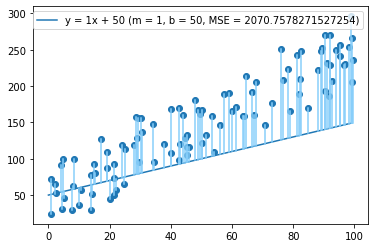

In [ ]:
plt.scatter(x_data, y_data)
plot_mse(1, 50, x_data, y_data)

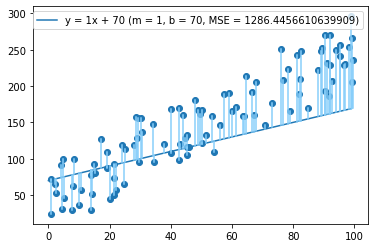

In [ ]:
plt.scatter(x_data, y_data)
m = 1
b = 70
plot_mse(m, b, x_data, y_data)

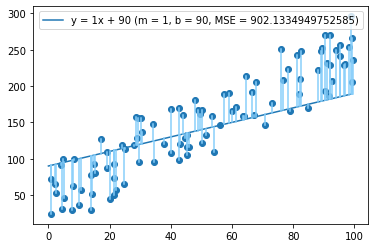

In [ ]:
plt.scatter(x_data, y_data)
m = 1
b = 90
plot_mse(m, b, x_data, y_data)

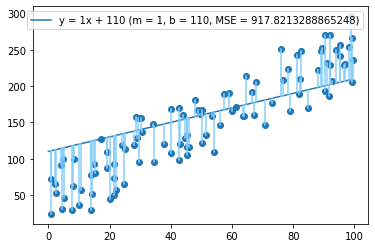

In [ ]:
plt.scatter(x_data, y_data)
plot_mse(1, 110, x_data, y_data)

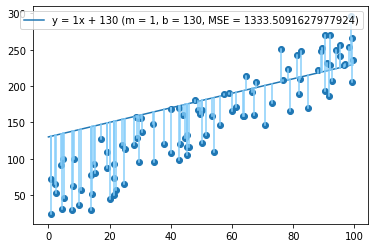

In [ ]:
plt.scatter(x_data, y_data)
plot_mse(1, 130, x_data, y_data)

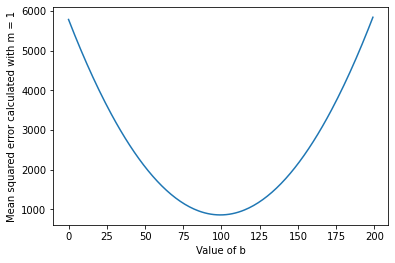

In [ ]:
def graph_mean_squared_error_b(x_data, y_data, min_bound = 0, max_bound = 200):
  b_vals = np.array(range(max_bound - min_bound)) + min_bound
  b_errs = [mean_squared_error(1, b, x_data, y_data) for b in b_vals]
  plt.plot(b_vals, b_errs)
  plt.xlabel("Value of b")
  plt.ylabel("Mean squared error calculated with m = 1")

graph_mean_squared_error_b(x_data, y_data)

In [ ]:
def grad_at_point(m, b, x_data, y_data):
  num_examples = x_data.size
  grad = np.zeros(2)
  grad[0] = 1 / num_examples * np.sum((m * x_data + b) - y_data)
  grad[1] = 1 / num_examples * np.sum(((m * x_data + b) - y_data) * x_data)
  return grad

In [ ]:
grad_at_point(1, 50, x_data, y_data)

array([  -49.2156083 , -3428.94141722])

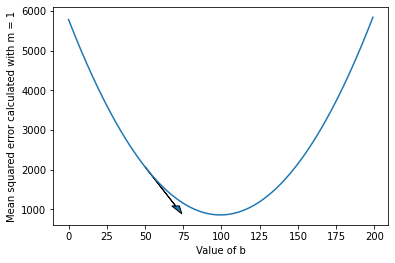

In [ ]:
graph_mean_squared_error_b(x_data, y_data)
dx = 20
plt.arrow(50, mean_squared_error(1, 50, x_data, y_data), dx, grad_at_point(1, 50, x_data, y_data)[0] * dx, head_width=5, head_length=200)

In [ ]:
def gradient_descent_b(m, init_b, x_data, y_data, iterations, alpha):
  curr_b = np.copy(init_b).astype(np.float32)
  b_vals = np.zeros(iterations)
  b_grads = []
  for i in range(iterations):
    b_grad = grad_at_point(m, curr_b, x_data, y_data)[0]
    curr_b -= alpha * b_grad
    b_vals[i] = curr_b
    b_grads.append(b_grad) 
  return [curr_b, b_vals, b_grads]

[-49.21560830443666, -24.607804959710098, -12.303903287346813, -6.1519486364679095, -3.0759751257257224, -1.5379883703546278, -0.7689911779718157, -0.3844925817804098, -0.1922470983819723, -0.09612435668275353] [74.60780334 86.91170502 93.06365967 96.13963318 97.67761993 98.44661713
 98.83111572 99.02336121 99.11948395 99.16754913] 99.16755


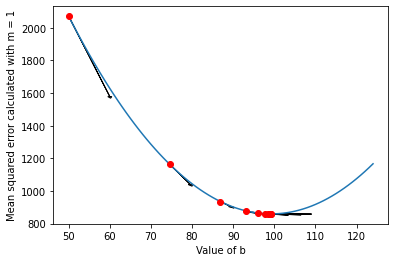

In [ ]:
[optimal_b, b_vals, b_grads] = gradient_descent_b(1, 50, x_data, y_data, 10, 0.5)

graph_mean_squared_error_b(x_data, y_data, 50, 125)
print(b_grads, b_vals, optimal_b)

for i in range(b_vals.size + 1):
  if i == 0:
    b_val = 50
  else:
    b_val = b_vals[i - 1]
  plt.plot(b_val, mean_squared_error(1, b_val, x_data, y_data), "ro")
  if i < b_vals.size:
    dx = 10 * b_grads[i] / b_grads[0]
    plt.arrow(b_val, mean_squared_error(1, b_val, x_data, y_data), dx, b_grads[i] * dx, head_width=1, head_length=10)

Text(0, 0.5, 'b')

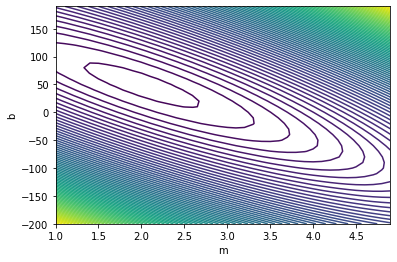

In [ ]:
m_vals = np.array(range(40)) / 10 + 1
b_vals = np.array(range(40)) * 10 - 200
J_vals = np.zeros((40,40))
x_3dplot = np.zeros((40,40))
y_3dplot = np.zeros((40,40))

for i in range(m_vals.size):
  for j in range(b_vals.size):
    err = mean_squared_error(m_vals[i], b_vals[j], x_data, y_data)
    J_vals[i][j] = err
    x_3dplot[i][j] = m_vals[i]
    y_3dplot[i][j] = b_vals[j]

x_plot = m_vals
y_plot = b_vals
z_plot = np.transpose(J_vals)

plt.contour(x_plot, y_plot, z_plot, 80)
plt.xlabel("m")
plt.ylabel("b")

Text(0.5, 0, 'J (MSE)')

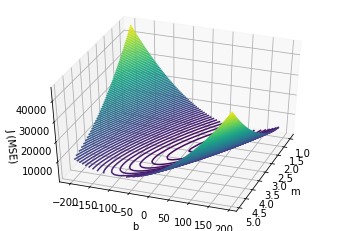

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, 20)

ax.contour3D(x_3dplot, y_3dplot, J_vals, 80)
ax.set_xlabel("m")
ax.set_ylabel("b")
ax.set_zlabel("J (MSE)")

[array(2.0097537, dtype=float32), array(48.61816, dtype=float32)] [array(2.0446453, dtype=float32), array(46.73519, dtype=float32)] [array(2.0040913, dtype=float32), array(48.937206, dtype=float32)]


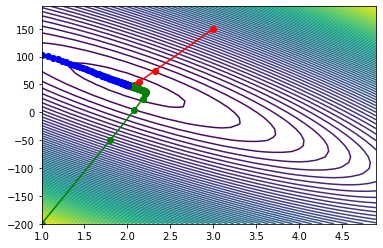

In [ ]:
def gradient_descent_all(init_m, init_b, x_data, y_data, iterations, alpha_m, alpha_b):
  curr_m = np.copy(init_m).astype(np.float32)
  curr_b = np.copy(init_b).astype(np.float32)
  vals = np.zeros((iterations + 1, 2))
  grads = []
  
  for i in range(iterations):
    vals[i][0] = curr_m
    vals[i][1] = curr_b
    grad = grad_at_point(curr_m, curr_b, x_data, y_data)
    grads.append(grad)
    curr_m -= alpha_m * grad[1]
    curr_b -= alpha_b * grad[0]

  optimal_params = [curr_m, curr_b]
  vals[iterations][0] = curr_m
  vals[iterations][1] = curr_b

  return [optimal_params, vals, grads]

# really jank, separate learning rates for m and b are used here because I didn't scale/normalize the data at all
[result_1, vals_1, grads_1] = gradient_descent_all(3, 150, x_data, y_data, 50, 0.00008, 0.5)
[result_2, vals_2, grads_2] = gradient_descent_all(1, -200, x_data, y_data, 50, 0.00005, 0.5)
[result_3, vals_3, grads_3] = gradient_descent_all(1, 103, x_data, y_data, 100, 0.0001, 0.5)

print(result_1, result_2, result_3)

plt.contour(x_plot, y_plot, z_plot, 80)
plt.plot(np.transpose(vals_1)[0], np.transpose(vals_1)[1], "ro-")
plt.plot(np.transpose(vals_2)[0], np.transpose(vals_2)[1], "go-")
plt.plot(np.transpose(vals_3)[0], np.transpose(vals_3)[1], "bo-")

Text(0.5, 0, 'J (MSE)')

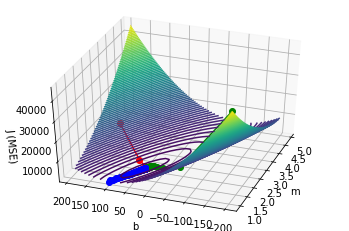

In [ ]:
z_vals_1 = [mean_squared_error(vals_1[i][0], vals_1[i][1], x_data, y_data) for i in range(vals_1.shape[0])]
z_vals_2 = [mean_squared_error(vals_2[i][0], vals_2[i][1], x_data, y_data) for i in range(vals_2.shape[0])]
z_vals_3 = [mean_squared_error(vals_3[i][0], vals_3[i][1], x_data, y_data) for i in range(vals_3.shape[0])]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, 200)
ax.contour3D(x_3dplot, y_3dplot, J_vals, 80)

ax.plot(np.transpose(vals_1)[0], np.transpose(vals_1)[1], z_vals_1, "ro-")
ax.plot(np.transpose(vals_2)[0], np.transpose(vals_2)[1], z_vals_2, "go-")
ax.plot(np.transpose(vals_3)[0], np.transpose(vals_3)[1], z_vals_3, "bo-")
ax.set_xlabel("m")
ax.set_ylabel("b")
ax.set_zlabel("J (MSE)")

Text(0.5, 0, 'J (MSE)')

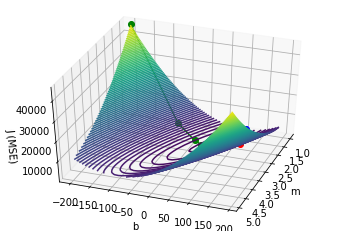

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, 20)
ax.contour3D(x_3dplot, y_3dplot, J_vals, 80)

ax.plot(np.transpose(vals_1)[0], np.transpose(vals_1)[1], z_vals_1, "ro-")
ax.plot(np.transpose(vals_2)[0], np.transpose(vals_2)[1], z_vals_2, "go-")
ax.plot(np.transpose(vals_3)[0], np.transpose(vals_3)[1], z_vals_3, "bo-")
ax.set_xlabel("m")
ax.set_ylabel("b")
ax.set_zlabel("J (MSE)")

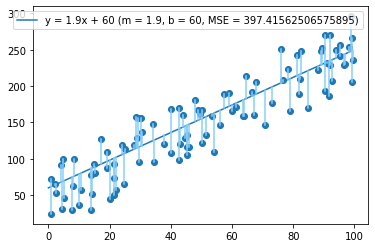

In [ ]:
plt.scatter(x_data, y_data)
plot_mse(1.9, 60, x_data, y_data)